# ALY6040 - Group 4 - EDA and Models Code

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
# Load the dataset
df = pd.read_csv('heart_2020.csv') 

# Display the first few rows of the dataframe
print(df.head())


  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

In [29]:
# Check the shape of the dataframe
print("Dataframe shape:", df.shape)

Dataframe shape: (319795, 18)


In [30]:
# Display data types of each column
print(df.dtypes)

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object


In [31]:
# Summary statistics for numeric columns
print(df.describe())

                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000


In [32]:
# Identify and remove duplicate entries
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [33]:
# Check for missing values
print(df.isnull().sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


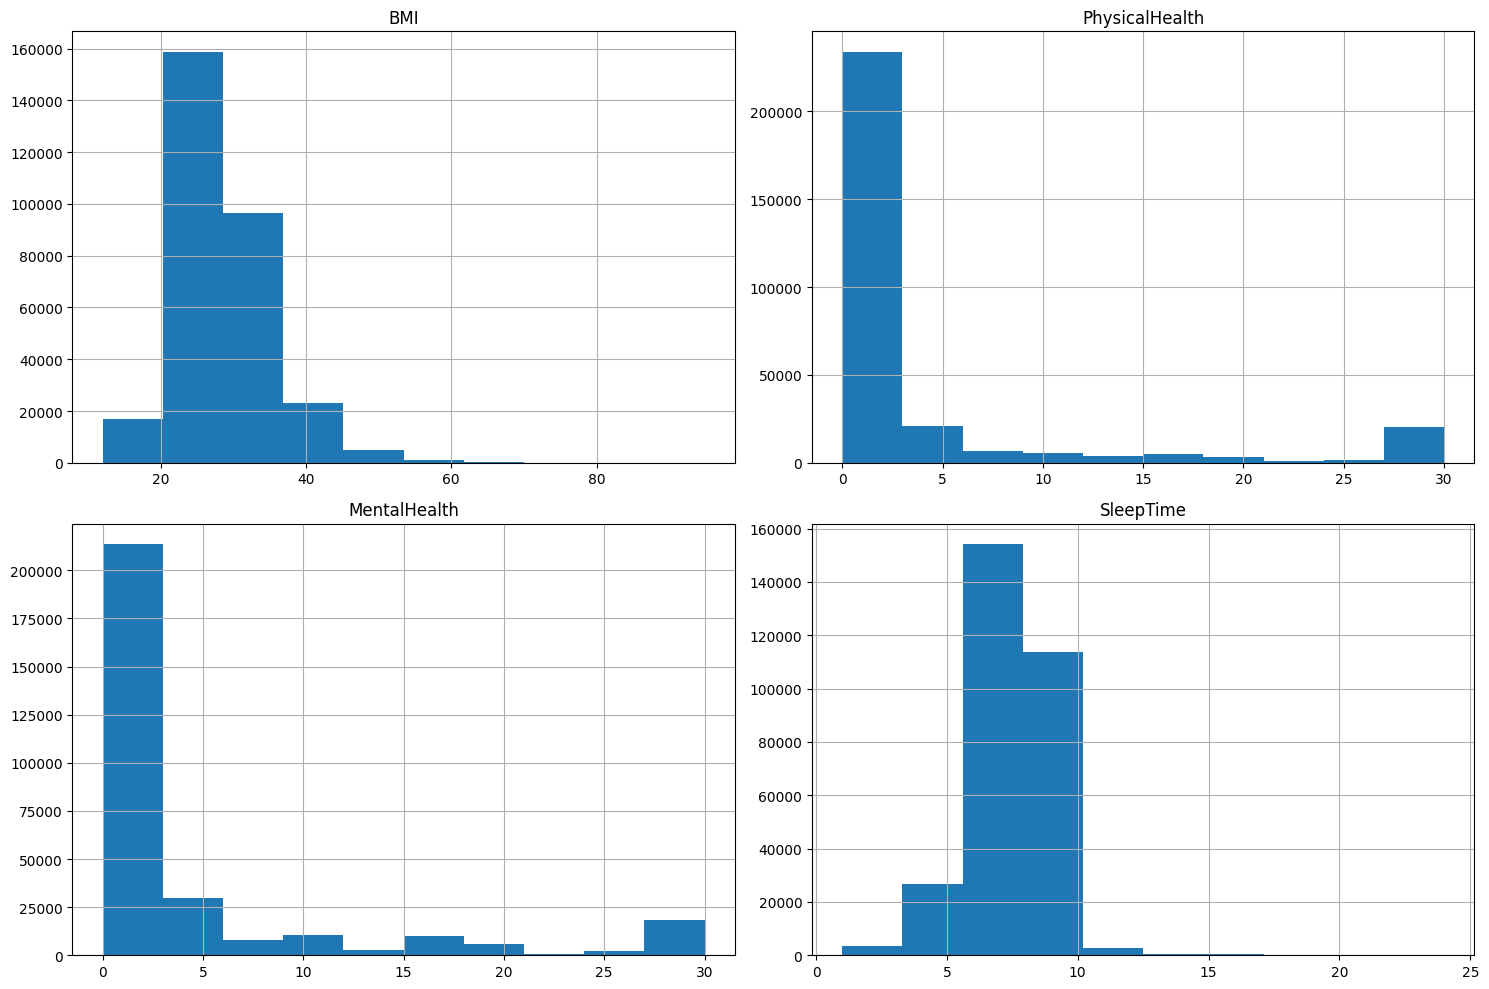

In [34]:
# Visualize the distribution of numeric variables
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

C:\Users\74450\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 301717.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for BMI: ShapiroResult(statistic=0.9305056289383088, pvalue=3.659114736459759e-124)
Shapiro-Wilk test for Sleep Time: ShapiroResult(statistic=0.8938479480016517, pvalue=7.865698286419043e-137)


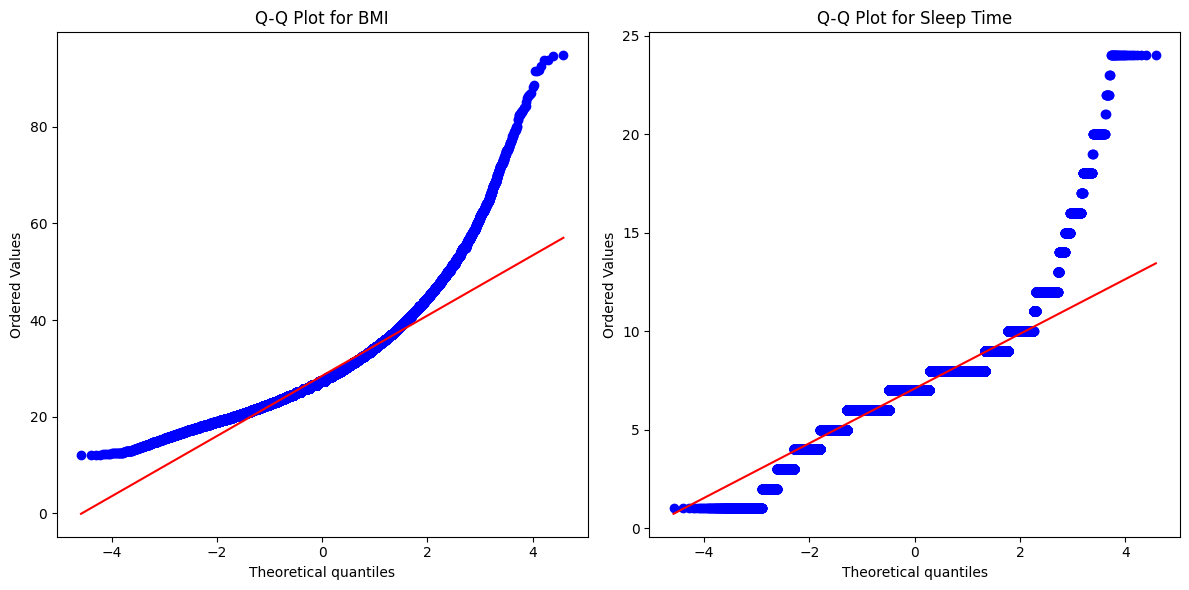

In [35]:
# Shapiro-Wilk test for normality
print("Shapiro-Wilk test for BMI:", stats.shapiro(df['BMI']))
print("Shapiro-Wilk test for Sleep Time:", stats.shapiro(df['SleepTime']))

# Q-Q plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(df['BMI'], dist="norm", plot=plt)
plt.title('Q-Q Plot for BMI')

plt.subplot(1, 2, 2)
stats.probplot(df['SleepTime'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Sleep Time')

plt.tight_layout()
plt.show()

In [36]:

# using IQR to detect outliers in BMI
#q1 = df['BMI'].quantile(0.25)
#q3 = df['BMI'].quantile(0.75)
#iqr = q3 - q1

# Define bounds for outliers
#lower_bound = q1 - 1.5 * iqr
#upper_bound = q3 + 1.5 * iqr

# Identify outliers
#outlier_indexes_bmi  = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]

# Plotting a boxplot
#sns.boxplot(x=df['BMI'])
#plt.title('Boxplot of BMI')
#plt.show()

# Print outliers
#print(f"Outliers in 'BMI':")
#print(outlier_indexes_bmi )

In [37]:

# using IQR to detect outliers in SleepTime
#q1 = df['SleepTime'].quantile(0.25)
#q3 = df['SleepTime'].quantile(0.75)
#iqr = q3 - q1

# Define bounds for outliers
#lower_bound = q1 - 1.5 * iqr
#upper_bound = q3 + 1.5 * iqr

# Identify outliers
#outlier_indexes_sleep  = df[(df['SleepTime'] < lower_bound) | (df['SleepTime'] > upper_bound)]

# Plotting a boxplot
#sns.boxplot(x=df['SleepTime'])
#plt.title('Boxplot of SleepTime')
#plt.show()

# Print outliers
#print(f"Outliers in 'SleepTime':")
#print(outlier_indexes_sleep )

In [38]:
# Find common indexes
#common_outliers = list(set(outlier_indexes_bmi) & set(outlier_indexes_sleep))
#common_outliers = [index for index in common_outliers if index in df.index]

# Remove common outliers
#df_cleaned = df.drop(index=common_outliers)

In [39]:
from scipy.stats import boxcox

# Box-Cox requires all data to be positive, hence the offset of 1 if there are zeros
df['BMI_boxcox'], _ = boxcox(df['BMI'] + 1)
df['Sleep_Time_boxcox'], _ = boxcox(df['SleepTime'] + 1)


In [40]:
df['Sleep_Time_boxcox'].head()

0    3.844293
1    5.113684
2    5.719674
3    4.489642
4    5.719674
Name: Sleep_Time_boxcox, dtype: float64

In [41]:
# Check the shape after
#print("Cleaned DataFrame shape:", df_cleaned.shape)

C:\Users\74450\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 301717.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for BMI_boxcox: ShapiroResult(statistic=0.999338474235824, pvalue=4.911198405767168e-26)
Shapiro-Wilk test for Sleep Sleep_Time_boxcox: ShapiroResult(statistic=0.9013593610218408, pvalue=1.3645133002496408e-134)


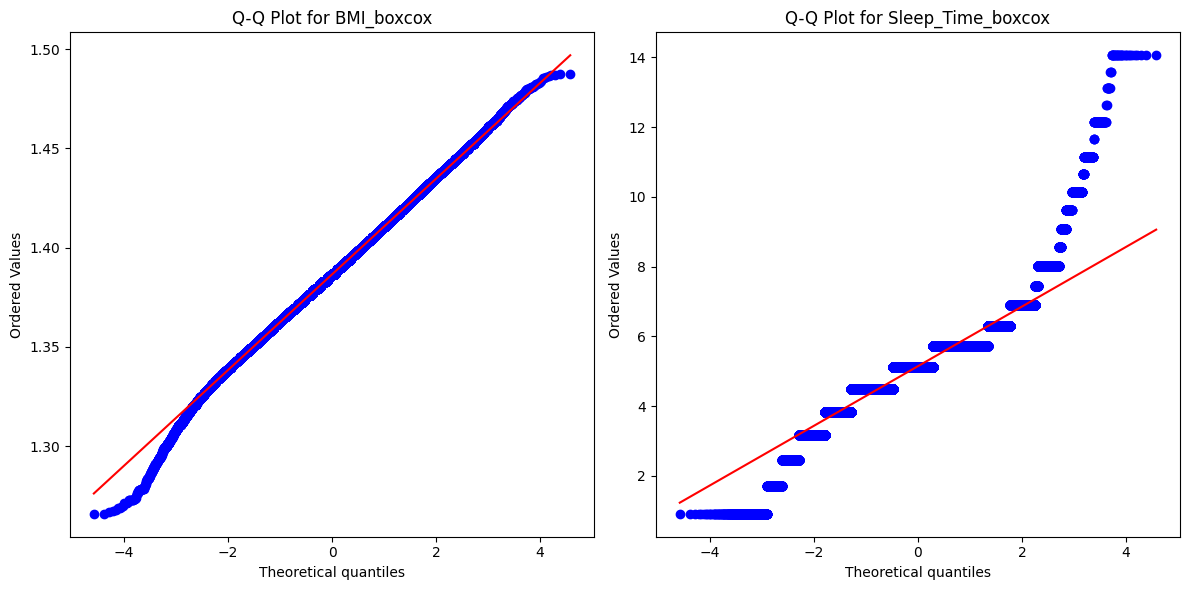

In [42]:
# Shapiro-Wilk test for normality
print("Shapiro-Wilk test for BMI_boxcox:", stats.shapiro(df['BMI_boxcox']))
print("Shapiro-Wilk test for Sleep Sleep_Time_boxcox:", stats.shapiro(df['Sleep_Time_boxcox']))

# Q-Q plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(df['BMI_boxcox'], dist="norm", plot=plt)
plt.title('Q-Q Plot for BMI_boxcox')

plt.subplot(1, 2, 2)
stats.probplot(df['Sleep_Time_boxcox'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Sleep_Time_boxcox')

plt.tight_layout()
plt.show()

In [43]:
# Replace the original 'BMI' and 'Sleep Time' columns with the transformed data
df['BMI'] = df['BMI_boxcox']
df['SleepTime'] = df['Sleep_Time_boxcox']

# Remove the temporary columns used for the Box-Cox transformation if you no longer need them
df.drop(['BMI_boxcox', 'Sleep_Time_boxcox'], axis=1, inplace=True)

# Store the updated data in df_cleaned
df_cleaned = df.copy()

In [44]:
# Check categories
unique_AgeCategory_categories = df_cleaned['AgeCategory'].unique()
print(unique_AgeCategory_categories)

unique_Race_categories = df_cleaned['Race'].unique()
print(unique_Race_categories)

unique_Diabetic_categories = df_cleaned['Diabetic'].unique()
print(unique_Diabetic_categories)

unique_GenHealth_categories = df_cleaned['GenHealth'].unique()
print(unique_GenHealth_categories)


['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']


In [45]:
# Replace multiple category names in the 'Race' column
df_cleaned['Race'] = df_cleaned['Race'].replace({
    'American Indian/Alaskan Native': 'American Native'
})

# Create a mapping based on the unique sorted age ranges
age_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80 or older': 12
}

# Apply the mapping to the AgeCategory column
df_cleaned['AgeCategory'] = df_cleaned['AgeCategory'].map(age_mapping)


# One-hot encode the 'Race' variable
encoder = OneHotEncoder()
# Ensure the encoder returns a dense array by setting sparse=False
race_encoded = encoder.fit_transform(df_cleaned[['Race']]).toarray()


# Create a DataFrame from the encoded data with the correct indices
race_encoded_df = pd.DataFrame(race_encoded,
                               columns=encoder.get_feature_names_out(['Race']),
                               index=df_cleaned.index)
#store the race column for future use
race = df_cleaned['Race'].copy()

# Combine the new DataFrame with the original DataFrame, drop the original 'Race' column
df_cleaned = pd.concat([df_cleaned.drop('Race', axis=1), race_encoded_df], axis=1)




# Create a mapping based on the Diabetic 
Diabetic_mapping = {
    'No': 0,
    'Yes': 1,
    'No, borderline diabetes': 2,
     'Yes (during pregnancy)': 3
}

# Apply the mapping to the Diabetic column
df_cleaned['Diabetic'] = df_cleaned['Diabetic'].map(Diabetic_mapping)


# Create a mapping based on the GenHealth 
GenHealth_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}

# Apply the mapping to the GenHealth column
df_cleaned['GenHealth'] = df_cleaned['GenHealth'].map(GenHealth_mapping)

# Create a mapping based on the Sex 
Sex_mapping = {
    'Female': 0,
    'Male': 1,
}

# Apply the mapping to the Sex column
df_cleaned['Sex'] = df_cleaned['Sex'].map(Sex_mapping)

#Apply binary mapping on all binary variables
binary_mapping = {'No': 0, 'Yes': 1}
df_cleaned['HeartDisease'] = df_cleaned['HeartDisease'].map(binary_mapping)
df_cleaned['Smoking'] = df_cleaned['Smoking'].map(binary_mapping)
df_cleaned['AlcoholDrinking'] = df_cleaned['AlcoholDrinking'].map(binary_mapping)
df_cleaned['Stroke'] = df_cleaned['Stroke'].map(binary_mapping)
df_cleaned['DiffWalking'] = df_cleaned['DiffWalking'].map(binary_mapping)
df_cleaned['PhysicalActivity'] = df_cleaned['PhysicalActivity'].map(binary_mapping)
df_cleaned['Asthma'] = df_cleaned['Asthma'].map(binary_mapping)
df_cleaned['KidneyDisease'] = df_cleaned['KidneyDisease'].map(binary_mapping)
df_cleaned['SkinCancer'] = df_cleaned['SkinCancer'].map(binary_mapping)



In [46]:
df_cleaned

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,1.319723,1,0,0,3.0,30.0,0,0,7,...,3.844293,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,0,1.349063,0,0,1,0.0,0.0,0,0,12,...,5.113684,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1.382944,1,0,0,20.0,30.0,0,1,9,...,5.719674,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,1.371699,0,0,0,0.0,0.0,0,0,11,...,4.489642,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0
4,0,1.369103,0,0,0,28.0,0.0,1,0,4,...,5.719674,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1.386517,1,0,0,7.0,0.0,1,1,8,...,4.489642,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
319791,0,1.396061,1,0,0,0.0,0.0,0,1,3,...,3.844293,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
319792,0,1.371852,0,0,0,0.0,0.0,0,0,5,...,4.489642,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
319793,0,1.406179,0,0,0,0.0,0.0,0,0,1,...,8.004936,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:
# Save the cleaned DataFrame to a new CSV file
#df_cleaned.to_csv('df_cleaned.csv', index=False)


# ----------------DONE EDA----------------

# ---------------- Fuad's part ----------------

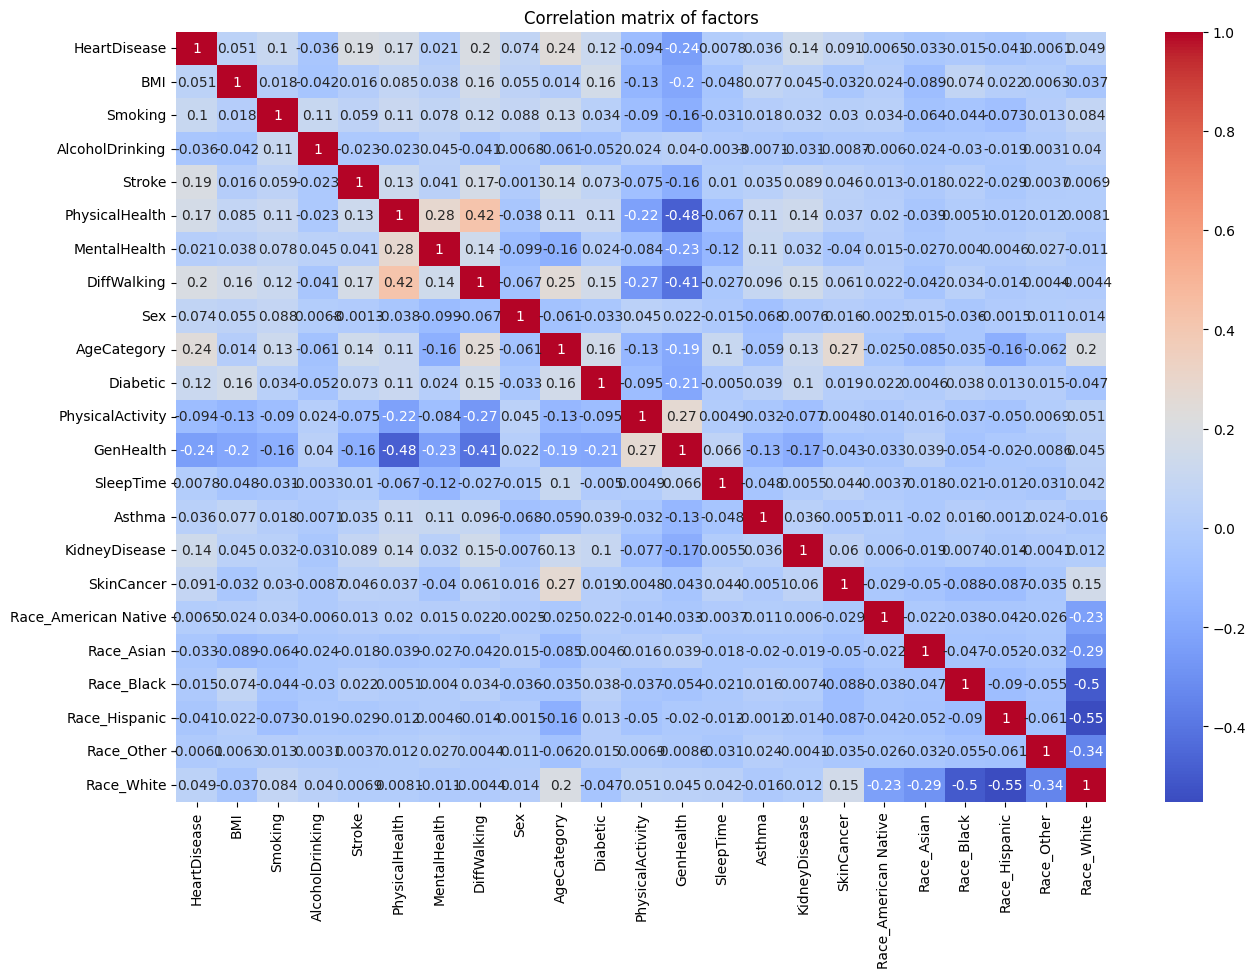

<Figure size 1200x800 with 0 Axes>

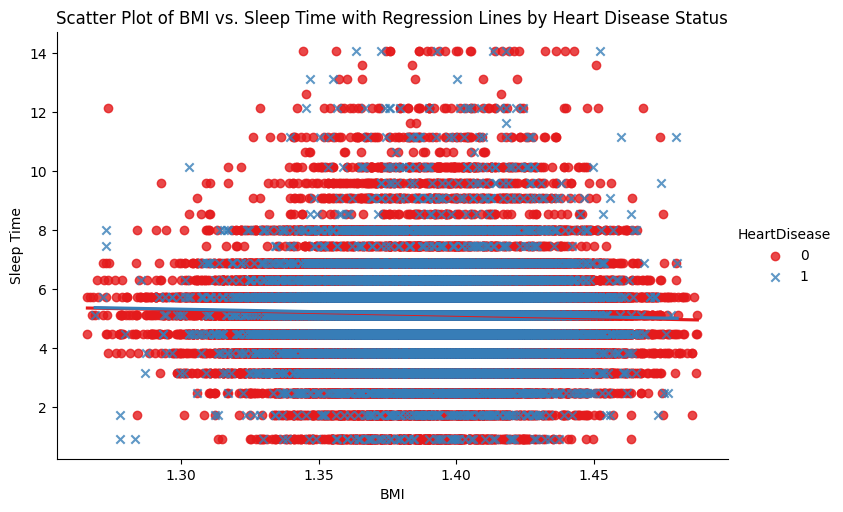

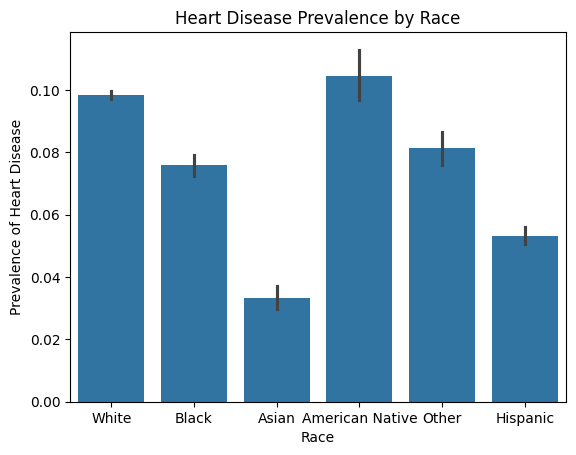

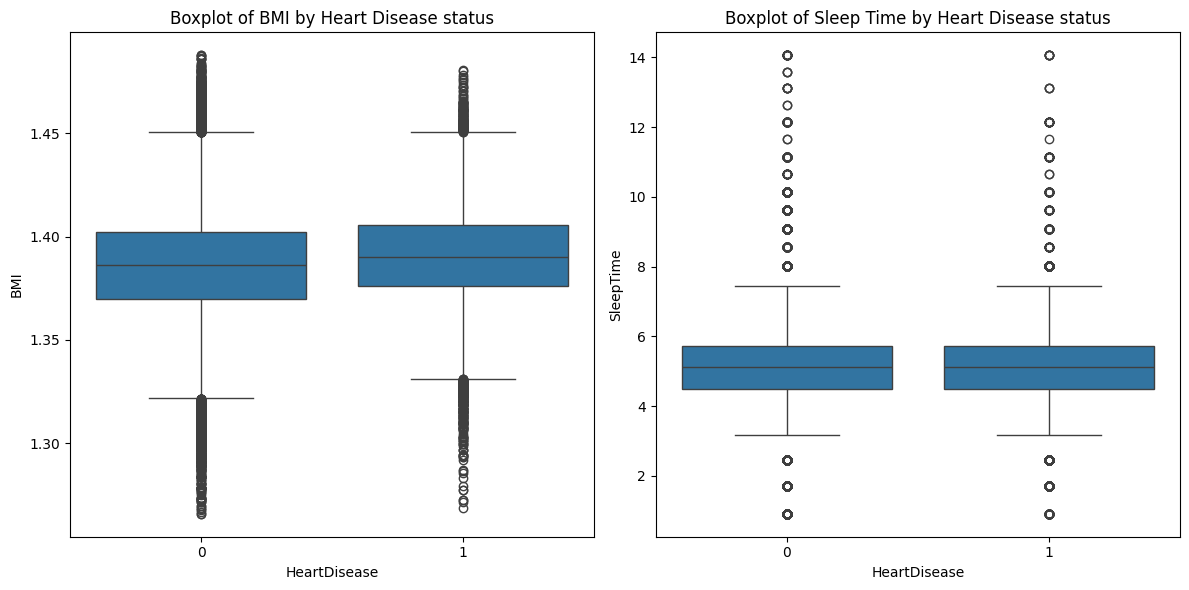

In [48]:
#Visualizations for Research Question 4 - Socio-economic Factors - Fuad A. Part

# 1. Correlation Matrix of Factors
plt.figure(figsize=(15, 10))
correlation = df_cleaned.corr()  # Assuming df_cleaned has the relevant factors
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of factors')
plt.show()

# 2. Scatter Plot with regression lines for BMI and Sleep Time by Heart Disease Status
import seaborn as sns
import matplotlib.pyplot as plt

# Considering df_cleaned is your DataFrame and it contains 'HeartDisease', 'BMI', and 'SleepTime' columns
plt.figure(figsize=(12, 8))
sns.lmplot(x='BMI', y='SleepTime', hue='HeartDisease', data=df_cleaned, aspect=1.5, ci=None, markers=['o', 'x'], palette='Set1')
plt.title('Scatter Plot of BMI vs. Sleep Time with Regression Lines by Heart Disease Status')
plt.xlabel('BMI')
plt.ylabel('Sleep Time')
plt.show()

# Concatenate the original 'Race' column back if it was not included in df_cleaned
df_cleaned = pd.concat([df_cleaned, race], axis=1)
# 3. Bar Chart of Heart Disease Prevalence by Race
sns.barplot(x='Race', y='HeartDisease', data=df_cleaned)
plt.title('Heart Disease Prevalence by Race')
plt.ylabel('Prevalence of Heart Disease')
plt.xlabel('Race')
plt.show()

# 4. Boxplots for Lifestyle and Biological Risk Factors
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='HeartDisease', y='BMI', data=df_cleaned)
plt.title('Boxplot of BMI by Heart Disease status')

plt.subplot(1, 2, 2)
sns.boxplot(x='HeartDisease', y='SleepTime', data=df_cleaned)
plt.title('Boxplot of Sleep Time by Heart Disease status')

plt.tight_layout()
plt.show()
# Combine the new DataFrame with the original DataFrame, drop the original 'Race' column
df_cleaned = pd.concat([df_cleaned.drop('Race', axis=1)], axis=1)

import seaborn as sns
import matplotlib.pyplot as plt


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     82383
           1       0.53      0.11      0.18      8133

    accuracy                           0.91     90516
   macro avg       0.72      0.55      0.57     90516
weighted avg       0.88      0.91      0.88     90516

Gradient Boosting Classifier Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     82383
           1       0.56      0.09      0.16      8133

    accuracy                           0.91     90516
   macro avg       0.74      0.54      0.56     90516
weighted avg       0.89      0.91      0.88     90516



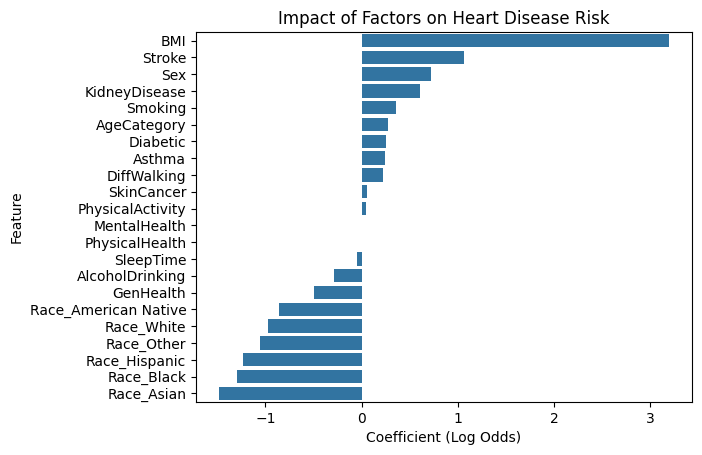

In [49]:
# ML Models for research Question 4 - Fuad A Part 

# Logistic Regression Model and Gradient Booster Classifier Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Considering 'df_cleaned' is the dataframe prepared and cleaned

# Prepare data for modeling
model_data = df_cleaned.drop(['HeartDisease'], axis=1)
target = df_cleaned['HeartDisease']  # Assuming HeartDisease has already been converted to binary (0, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(model_data, target, test_size=0.3, random_state=42)

# Fit logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Fit Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Predictions from logistic regression and Gradient Boosting
y_pred_log = log_reg.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)

# Generate classification reports with zero_division set to 0
log_reg_report = classification_report(y_test, y_pred_log, zero_division=0)
gb_report = classification_report(y_test, y_pred_gb, zero_division=0)

print("Logistic Regression Report:\n", log_reg_report)
print("Gradient Boosting Classifier Report:\n", gb_report)

# Extract and plot coefficients for logistic regression
coefficients = log_reg.coef_[0]
features = model_data.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Impact of Factors on Heart Disease Risk')
plt.xlabel('Coefficient (Log Odds)')
plt.ylabel('Feature')
plt.show()


# ---------------- Xiao's part ----------------

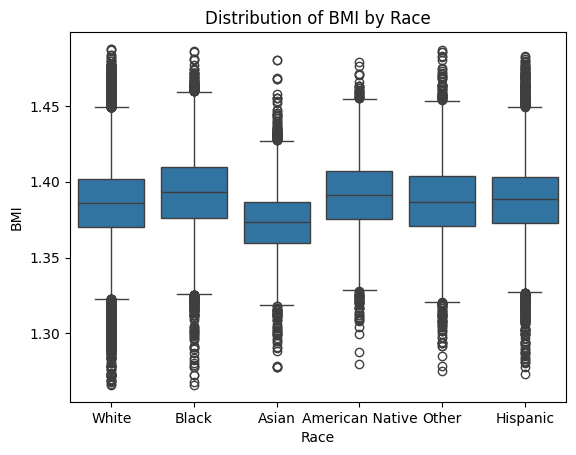

In [50]:
# Concatenate the original 'Race' column back if it was not included in df_cleaned
df_cleaned = pd.concat([df_cleaned, race], axis=1)
# For a continuous risk factor like BMI
sns.boxplot(x='Race', y='BMI', data=df_cleaned)
plt.title('Distribution of BMI by Race')
plt.ylabel('BMI')
plt.xlabel('Race')
plt.show()



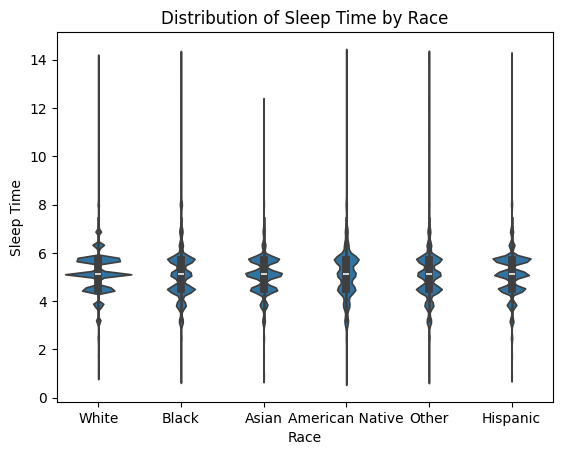

In [51]:
# For a continuous risk factor like SleepTime
sns.violinplot(x='Race', y='SleepTime', data=df_cleaned)
plt.title('Distribution of Sleep Time by Race')
plt.ylabel('Sleep Time')
plt.xlabel('Race')
plt.show()


In [52]:
# ML Models for research Question 2 - Xiao's Part 
from imblearn.under_sampling import RandomUnderSampler


# Combine the new DataFrame with the original DataFrame, drop the original 'Race' column
df_cleaned = pd.concat([df_cleaned.drop('Race', axis=1)], axis=1)

# Load dataset
df = df_cleaned.copy()

# Define features X and target y
X = df.drop('HeartDisease', axis=1)  # assuming 'HeartDisease' is your target variable
y = df['HeartDisease']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score

# Create a logistic regression model
model1 = LogisticRegression(max_iter=1000, class_weight='balanced')  # Increase max_iter if the model doesn't converge

# Fit the model
model1.fit(X_train, y_train)

# Predict on the test data
y_pred = model1.predict(X_test)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Print the model coefficients for the 'Race' features
race_features = [col for col in X.columns if 'Race_' in col]
coefficients = pd.DataFrame(model1.coef_.flatten(), index=X.columns, columns=['Coefficient'])
print(coefficients.loc[race_features])

# Define Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scorer, focusing on F1 score for the minority class
f1_scorer = make_scorer(f1_score, pos_label=1)  # pos_label might need adjustment based on your class labels

# Perform cross-validation
scores = cross_val_score(model1, X, y, scoring=f1_scorer, cv=skf)

print("F1 Scores per fold: ", scores)
print("Average F1 Score: ", scores.mean())



              precision    recall  f1-score   support

           0       0.97      0.74      0.84     54894
           1       0.23      0.77      0.35      5450

    accuracy                           0.74     60344
   macro avg       0.60      0.75      0.59     60344
weighted avg       0.90      0.74      0.79     60344

[[40568 14326]
 [ 1280  4170]]
                      Coefficient
Race_American Native    -0.721504
Race_Asian              -1.290106
Race_Black              -1.017297
Race_Hispanic           -0.934566
Race_Other              -0.806527
Race_White              -0.781807
F1 Scores per fold:  [0.35292152 0.35506311 0.35052736 0.35381205 0.35124943]
Average F1 Score:  0.35271469367806013


In [66]:
#%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [65]:
from sklearn.metrics import precision_recall_curve, f1_score

# Predict probabilities
probabilities = model1.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

# Apply the optimal threshold
predictions = (probabilities >= optimal_threshold).astype(int)

print("Optimal Threshold:", optimal_threshold)
print("Optimal F1 Score:", optimal_f1)

# Print the classification report and confusion matrix
print(classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Optimal Threshold: 0.6889854582531902
Optimal F1 Score: 0.391567494049643
              precision    recall  f1-score   support

           0       0.95      0.88      0.92     54894
           1       0.31      0.53      0.39      5450

    accuracy                           0.85     60344
   macro avg       0.63      0.71      0.65     60344
weighted avg       0.89      0.85      0.87     60344

Confusion Matrix:
 [[48518  6376]
 [ 2571  2879]]


In [56]:
rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

# Check the balance after undersampling
print("Before undersampling:", y_train.value_counts())
print("After undersampling:", pd.Series(y_undersampled).value_counts())

# Create a logistic regression model
model2 = LogisticRegression(max_iter=1000)  # Increase max_iter if the model doesn't converge

# Fit the model
model2.fit(X_undersampled, y_undersampled)

# Predict on the test data
y_pred = model2.predict(X_test)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Print the model coefficients for the 'Race' features
race_features = [col for col in X.columns if 'Race_' in col]
coefficients = pd.DataFrame(model2.coef_.flatten(), index=X.columns, columns=['Coefficient'])
print(coefficients.loc[race_features])

Before undersampling: HeartDisease
0    219562
1     21811
Name: count, dtype: int64
After undersampling: HeartDisease
0    21811
1    21811
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     54894
           1       0.23      0.76      0.35      5450

    accuracy                           0.74     60344
   macro avg       0.60      0.75      0.59     60344
weighted avg       0.90      0.74      0.79     60344

[[40630 14264]
 [ 1291  4159]]
                      Coefficient
Race_American Native    -0.653446
Race_Asian              -1.081314
Race_Black              -0.834142
Race_Hispanic           -0.764224
Race_Other              -0.590957
Race_White              -0.657898


In [60]:
import numpy as np
from sklearn.metrics import roc_curve

# Create a logistic regression model
model3 = LogisticRegression(max_iter=1000, class_weight='balanced')  # Increase max_iter if the model doesn't converge

# Fit the model
model3.fit(X_train, y_train)

# Predict on the test data
y_pred = model3.predict(X_test)

# Predict probabilities
proba = model3.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, proba)

# Find the optimal threshold (example: Youden’s J statistic)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Make predictions based on the new threshold
predictions = (proba >= optimal_threshold).astype(int)

# Print the classification report and confusion matrix
print(classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

# Print the model coefficients for the 'Race' features
race_features = [col for col in X.columns if 'Race_' in col]
coefficients = pd.DataFrame(model1.coef_.flatten(), index=X.columns, columns=['Coefficient'])
print(coefficients.loc[race_features])



              precision    recall  f1-score   support

           0       0.97      0.72      0.83     54894
           1       0.22      0.79      0.34      5450

    accuracy                           0.73     60344
   macro avg       0.59      0.75      0.58     60344
weighted avg       0.90      0.73      0.78     60344

Confusion Matrix:
 [[39543 15351]
 [ 1160  4290]]
                      Coefficient
Race_American Native    -0.922372
Race_Asian              -1.497888
Race_Black              -1.266244
Race_Hispanic           -1.214325
Race_Other              -0.994756
Race_White              -0.967884


Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     68627
           1       0.22      0.35      0.27      6803

    accuracy                           0.83     75430
   macro avg       0.58      0.61      0.59     75430
weighted avg       0.87      0.83      0.85     75430

[[60364  8263]
 [ 4441  2362]]
                 Feature  Importance
16  Race_American Native    0.003092
17            Race_Asian    0.003061
18            Race_Black    0.008864
19         Race_Hispanic    0.010797
20            Race_Other    0.004964


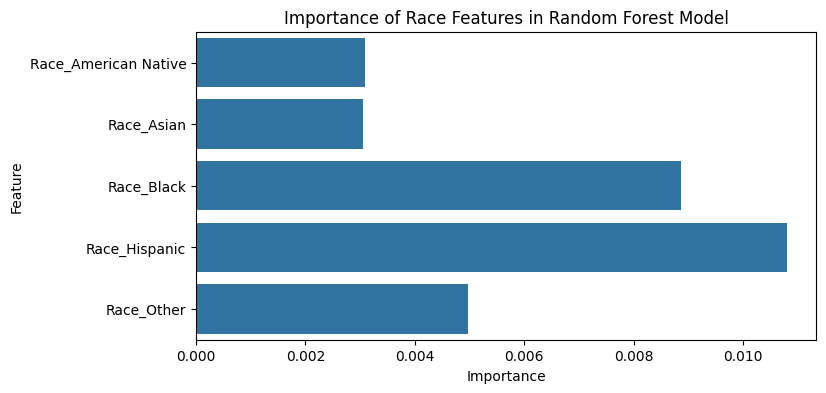

In [68]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split data into features and target
X = df.drop('HeartDisease', axis=1)  # Assuming 'HeartDisease' is the column to predict
y = df['HeartDisease']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.ensemble import RandomForestClassifier

# Apply SMOTE to generate synthetic samples
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42) 

# Train the model
rf.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# More detailed report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


# Get feature importances from the random forest model
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easier handling
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Filter the DataFrame to show only the specific features
specific_features = feature_importance_df[feature_importance_df['Feature'].isin(['Race_American Native', 'Race_Black', 'Race_Asian', 
                                                                                 'Race_Hispanic', 'Race_Other'])]

# Display the filtered feature importances
print(specific_features)

# Plotting specific feature importances
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=specific_features)
plt.title('Importance of Race Features in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# ---------------- Akash's Part ----------------

Proportion of diabetics with and without heart disease:
HeartDisease
No     0.790103
Yes    0.209897
Name: proportion, dtype: float64
Proportion of diabetics engaging in physical activity:
PhysicalActivity
Yes    0.629992
No     0.370008
Name: proportion, dtype: float64


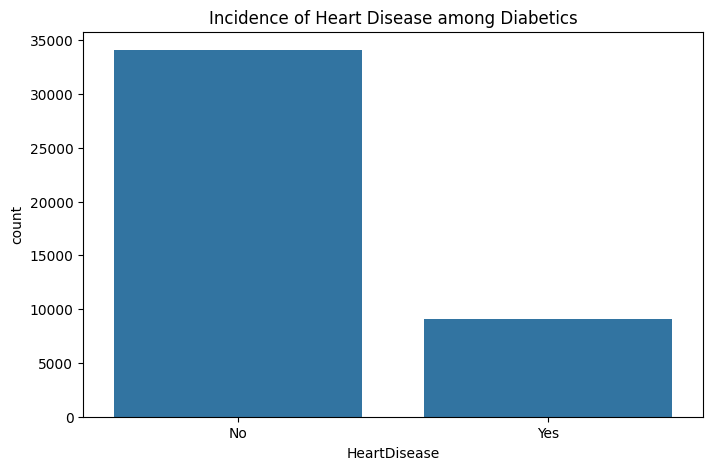

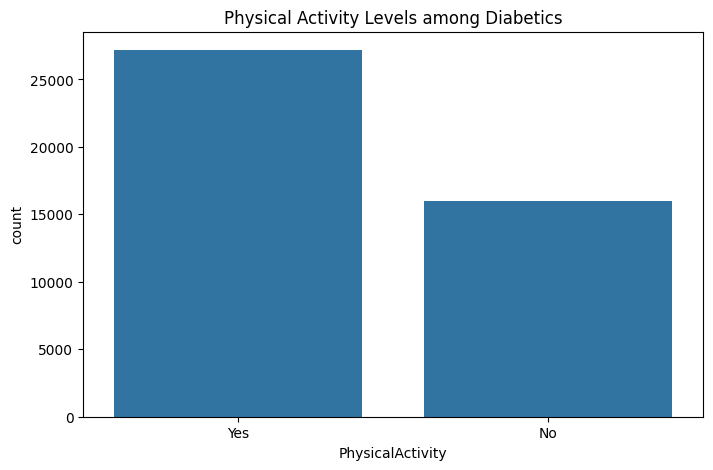

In [142]:
# EDA for research Question 1 - Akash's Part 
data = pd.read_csv('heart_2020_cleaned.csv')

# Filter for diabetics
diabetic_data = data[data['Diabetic'].str.contains('Yes')]

# Descriptive statistics for heart disease incidence among diabetics
heart_disease_counts = diabetic_data['HeartDisease'].value_counts(normalize=True)
print("Proportion of diabetics with and without heart disease:")
print(heart_disease_counts)

# Descriptive statistics for physical activity among diabetics
physical_activity_counts = diabetic_data['PhysicalActivity'].value_counts(normalize=True)
print("Proportion of diabetics engaging in physical activity:")
print(physical_activity_counts)

# Visualization of heart disease incidence among diabetics
plt.figure(figsize=(8, 5))
sns.countplot(x='HeartDisease', data=diabetic_data)
plt.title('Incidence of Heart Disease among Diabetics')
plt.show()

# Visualization of physical activity levels among diabetics
plt.figure(figsize=(8, 5))
sns.countplot(x='PhysicalActivity', data=diabetic_data)
plt.title('Physical Activity Levels among Diabetics')
plt.show()

In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load your dataset
data = pd.read_csv('heart_2020_cleaned.csv')

# Filter for diabetics if necessary and encode categorical variables
data = data[data['Diabetic'] == 'Yes']  # Adjust based on your dataset's encoding
data['PhysicalActivity'] = data['PhysicalActivity'].apply(lambda x: 1 if x == 'Active' else 0)

# Define the features and target
X = data[['PhysicalActivity']]  
y = data['HeartDisease']        

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))




###########random forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('heart_2020_cleaned.csv')

# Filter for diabetics and encode categorical variables
data = data[data['Diabetic'] == 'Yes']  # Adjust based on your dataset's encoding
data['PhysicalActivity'] = data['PhysicalActivity'].apply(lambda x: 1 if x == 'Active' else 0)

# Define features and target variable
X = data[['PhysicalActivity']]  # Could add more features here
y = data['HeartDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Print results
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# Optionally, print feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

[[6348    0]
 [1770    0]]
              precision    recall  f1-score   support

          No       0.78      1.00      0.88      6348
         Yes       0.00      0.00      0.00      1770

    accuracy                           0.78      8118
   macro avg       0.39      0.50      0.44      8118
weighted avg       0.61      0.78      0.69      8118



C:\Users\74450\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\74450\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\74450\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

[[6348    0]
 [1770    0]]
              precision    recall  f1-score   support

          No       0.78      1.00      0.88      6348
         Yes       0.00      0.00      0.00      1770

    accuracy                           0.78      8118
   macro avg       0.39      0.50      0.44      8118
weighted avg       0.61      0.78      0.69      8118

                  importance
PhysicalActivity         0.0


C:\Users\74450\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\74450\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\74450\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

# ---------------- Shiny's Part ----------------

In [144]:
df = pd.read_csv("heart_2020_cleaned.csv")

In [145]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [146]:
df.shape

(301717, 18)

<Axes: xlabel='HeartDisease'>

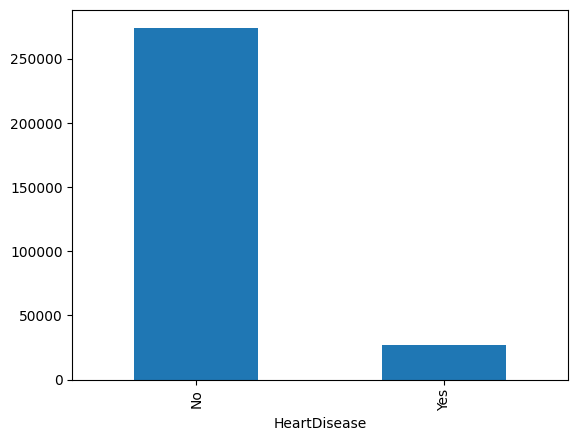

In [147]:
# EDA 
df["HeartDisease"].value_counts().plot(kind = "bar")

In [148]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 301717 │ │ string      │ 14    │                                                          │
│ │ Number of columns │ 18     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name           ┃ NA   ┃ NA %    ┃ mean    ┃ sd    ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ BMI                   │    0 │       0 │      28 │   6.5 │   12 │    24 │    27 │    32 │     95 │   ▆▇▁   │  │
│ │ PhysicalHealth        │    0 │       0 │     3.6 │   8.1 │    0 │     0 │     0 │     2 │     30 │ ▇    ▁  │  │
│ │ MentalHealth          │    0 │       0 │     4.1 │   8.1 │    0 │     0 │     0 │     4 │     30 │ ▇▁   ▁  │  │
│ │ SleepTime             │    0 │       0 │     7.1 │   1.5 │    1 │     6 │     7 │     8 │     24 │    ▇▁   │  │
│ └───────────────────────┴──────┴─────────┴─────────┴───────┴──────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ HeartDisease                     │      0 │         0 │                          1 │                301717 │  │
│ │ Smoking                          │      0 │         0 │                          1 │                301717 │  │
│ │ AlcoholDrinking                  │      0 │         0 │                          1 │                301717 │  │
│ │ Stroke                           │      0 │         0 │                          1 │                301717 │  │
│ │ DiffWalking                      │      0 │         0 │                          1 │                301717 │  │
│ │ Sex                              │      0 │         0 │                          1 │                301717 │  │
│ │ AgeCategory                      │      0 │         0 │                        1.2 │                348421 │  │
│ │ Race                             │      0 │         0 │                          1 │                312101 │  │
│ │ Diabetic                         │      0 │         0 │                        1.1 │                320381 │  │
│ │ PhysicalActivity                 │      0 │         0 │                          1 │                301717 │  │
│ │ GenHealth                        │      0 │         0 │                        1.3 │                406513 │  │
│ │ Asthma                           │      0 │         0 │                          1 │                301717 │  │
│ │ KidneyDisease                    │      0 │         0 │                          1 │                301717 │  │
│ │ SkinCancer                       │      0 │         

In [149]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [150]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


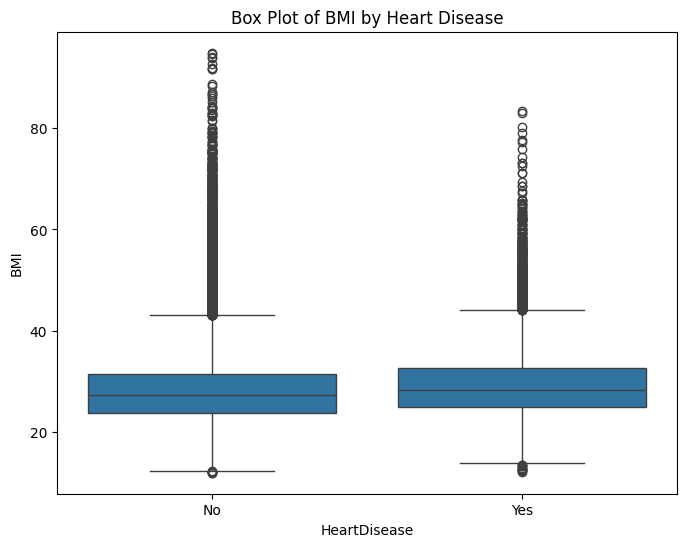

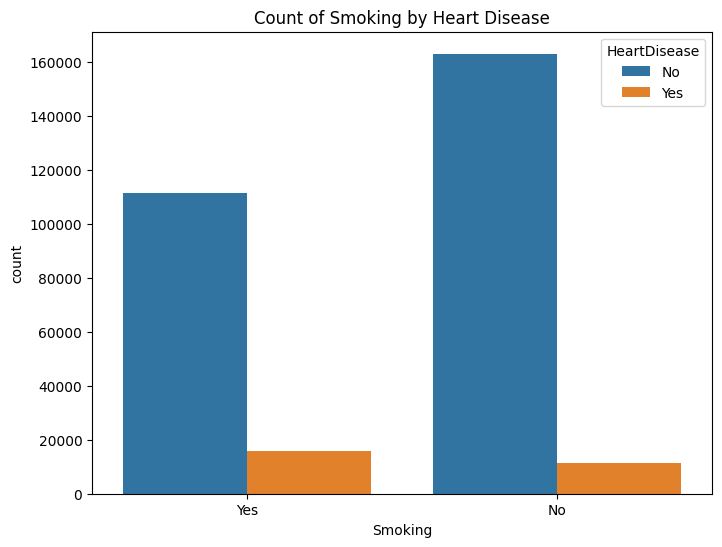

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("heart_2020_cleaned.csv")

# Bivariate Analysis

# Categorical vs. Numerical: Boxplot
plt.figure(figsize=(8, 6))  # Adjusted size
sns.boxplot(x='HeartDisease', y='BMI', data=df)
plt.title('Box Plot of BMI by Heart Disease')
plt.show()

# Categorical vs. Categorical: Countplot
plt.figure(figsize=(8, 6))  # Adjusted size
sns.countplot(x='Smoking', hue='HeartDisease', data=df)
plt.title('Count of Smoking by Heart Disease')
plt.show()


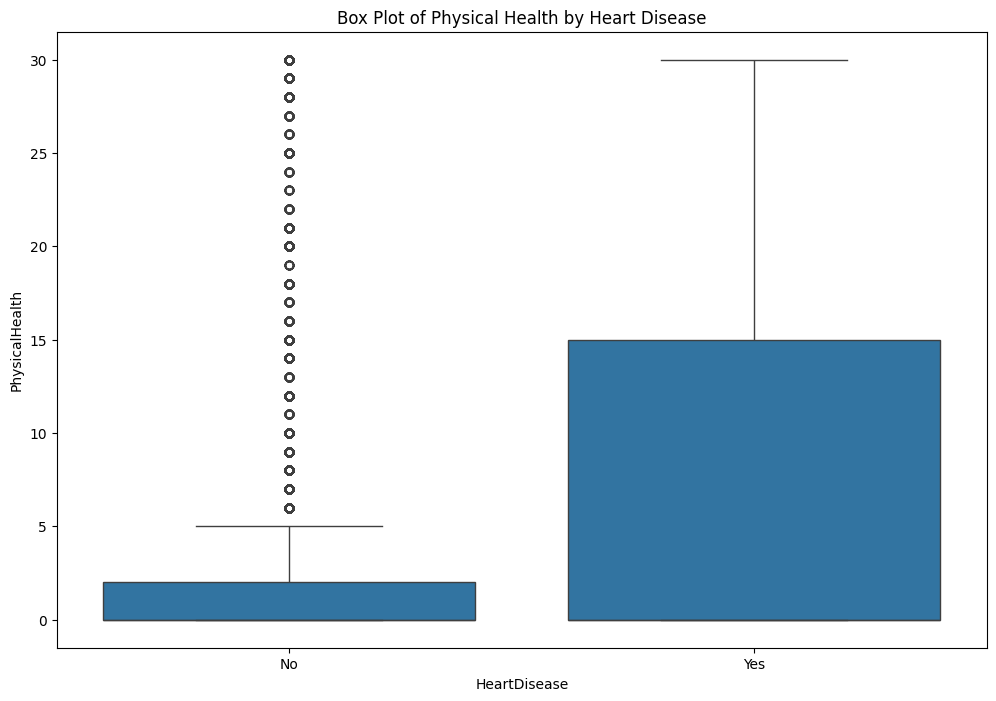

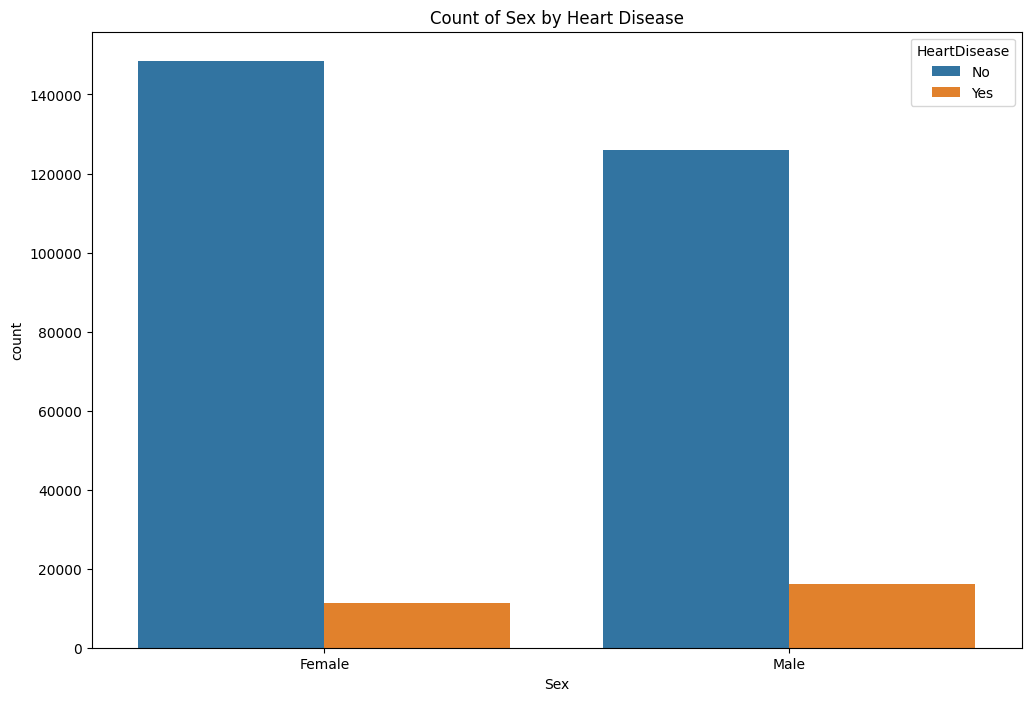

In [152]:
# Categorical vs. Numerical: Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='HeartDisease', y='PhysicalHealth', data=df)
plt.title('Box Plot of Physical Health by Heart Disease')
plt.show()

# Categorical vs. Categorical: Countplot
plt.figure(figsize=(12, 8))
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title('Count of Sex by Heart Disease')
plt.show()




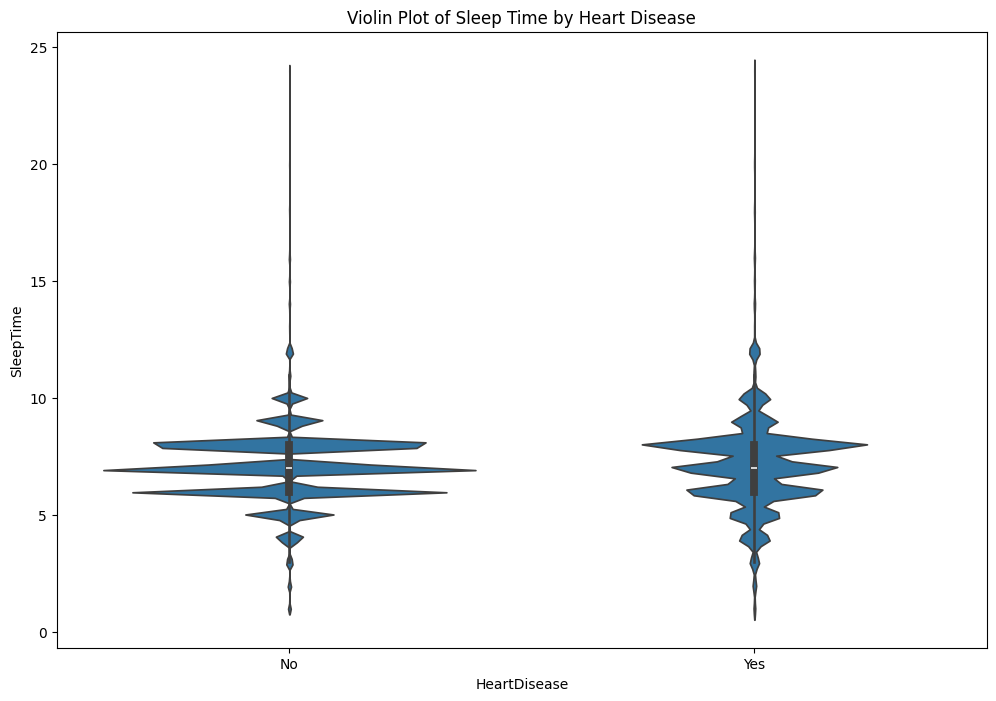

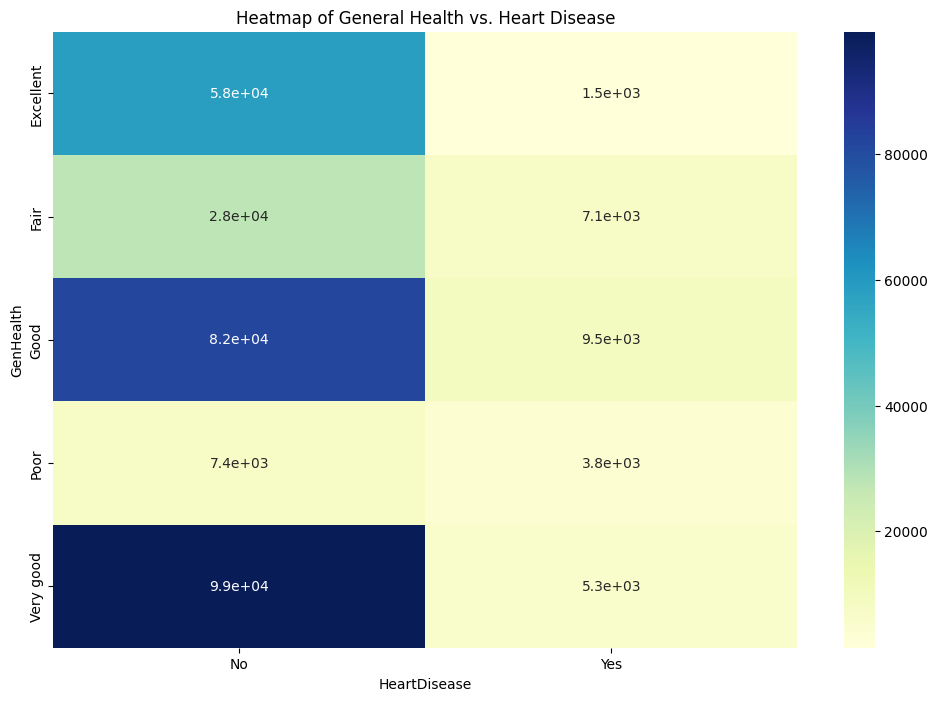

In [153]:
# Categorical vs. Numerical: Violinplot
plt.figure(figsize=(12, 8))
sns.violinplot(x='HeartDisease', y='SleepTime', data=df)
plt.title('Violin Plot of Sleep Time by Heart Disease')
plt.show()

# Categorical vs. Categorical: Heatmap
contingency_table = pd.crosstab(df['GenHealth'], df['HeartDisease'])
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Heatmap of General Health vs. Heart Disease')
plt.show()

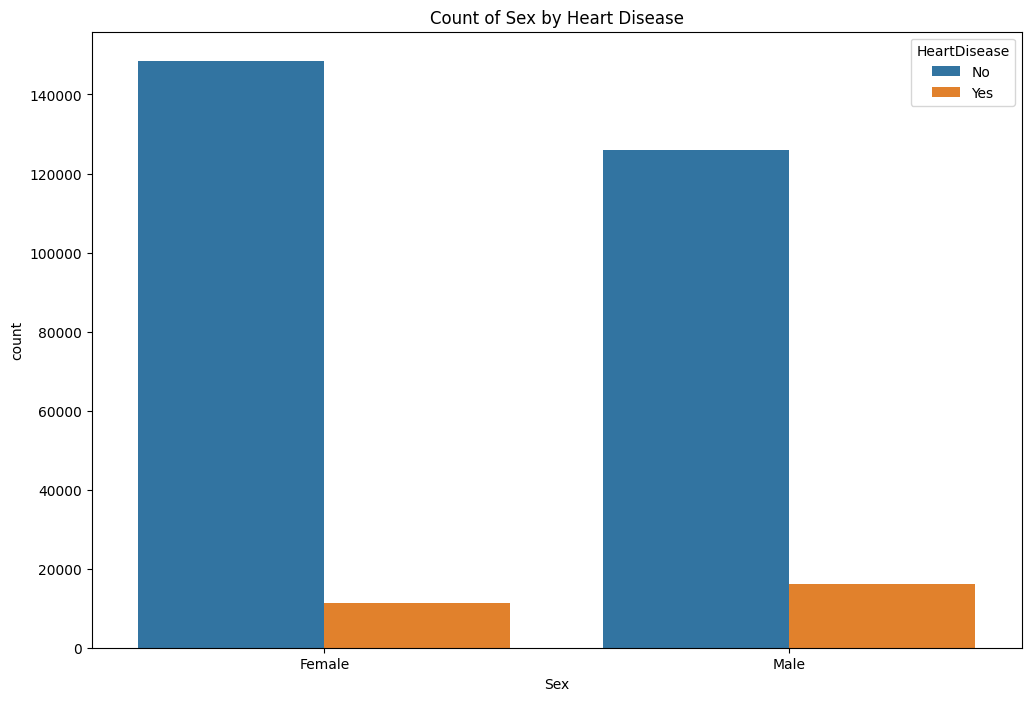

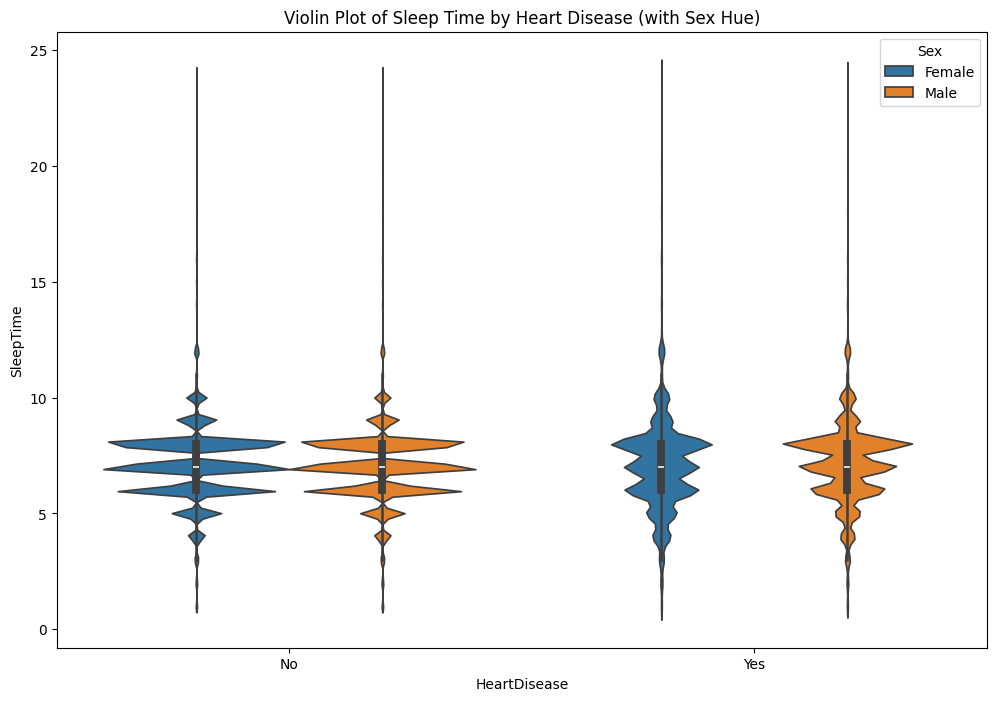

In [154]:
# Categorical vs. Categorical: Countplot with Hue
plt.figure(figsize=(12, 8))
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title('Count of Sex by Heart Disease')
plt.show()

# Categorical vs. Numerical: Violinplot with Hue
plt.figure(figsize=(12, 8))
sns.violinplot(x='HeartDisease', y='SleepTime', hue='Sex', data=df)
plt.title('Violin Plot of Sleep Time by Heart Disease (with Sex Hue)')
plt.show()


In [155]:
# MODELLING 

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301717 entries, 0 to 301716
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC  # Import SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [158]:
X = df.drop(columns=['HeartDisease'])  # Features
y = df['HeartDisease']  # Target



In [159]:
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [160]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get column data types
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns



In [161]:
categorical_features

Index(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [162]:
# LOGISTIC REGRESSION MODEL 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Assuming numeric_features, categorical_features, X_train, and y_train are defined earlier

# Define preprocessing steps for numerical and categorical columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Keep remaining columns unchanged
)

# Define the Logistic Regression classifier
lg_classifier = LogisticRegression()

# Combine preprocessing and modeling steps in the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lg_classifier)
])



In [163]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the testing data
accuracy = pipeline.score(X_test, y_test)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.9108444915815989


In [164]:
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Decision Tree pipeline
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', dt_classifier)
])




In [165]:
# Fit the Decision Tree pipeline to the training data
dt_pipeline.fit(X_train, y_train)

# Evaluate the Decision Tree pipeline on the testing data
accuracy = dt_pipeline.score(X_test, y_test)
print("Decision Tree Accuracy:", accuracy)


Decision Tree Accuracy: 0.8526614079278801


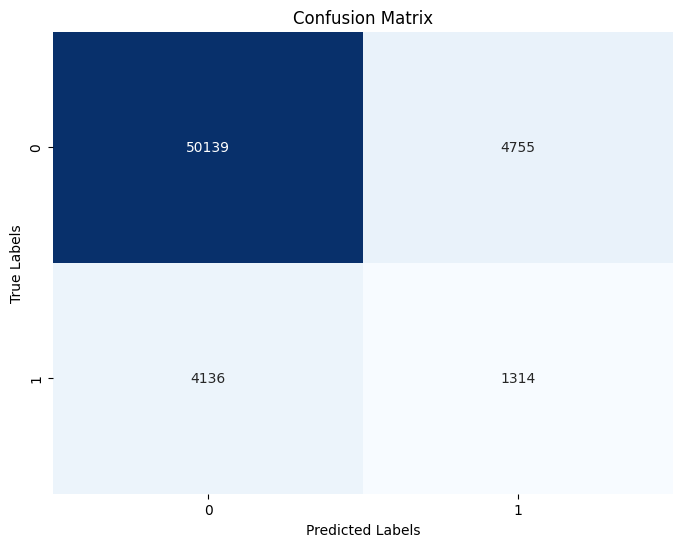

Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.91      0.92     54894
         Yes       0.22      0.24      0.23      5450

    accuracy                           0.85     60344
   macro avg       0.57      0.58      0.57     60344
weighted avg       0.86      0.85      0.86     60344



In [166]:
# DECISION TREE MODEL 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels using the Decision Tree pipeline
y_pred = dt_pipeline.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.8946705554819038


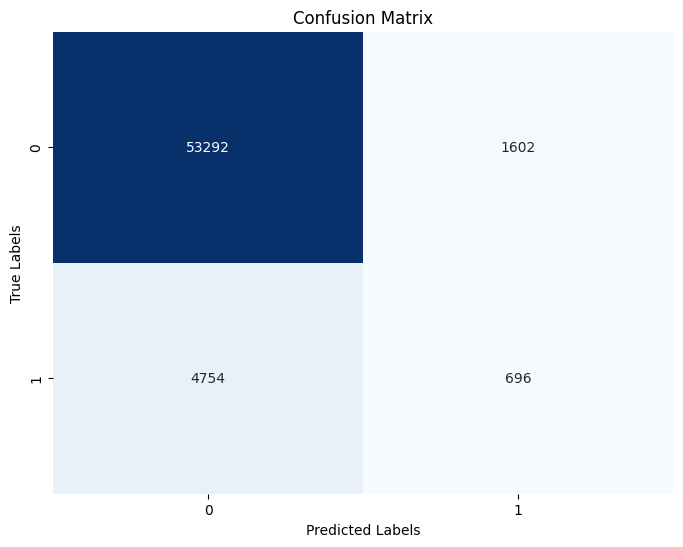

Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.97      0.94     54894
         Yes       0.30      0.13      0.18      5450

    accuracy                           0.89     60344
   macro avg       0.61      0.55      0.56     60344
weighted avg       0.86      0.89      0.87     60344



In [167]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

# Fit the Random Forest pipeline to the training data
rf_pipeline.fit(X_train, y_train)

# Evaluate the Random Forest pipeline on the testing data
accuracy = rf_pipeline.score(X_test, y_test)
print("Random Forest Accuracy:", accuracy)

# Predict labels using the Random Forest pipeline
y_pred = rf_pipeline.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))